In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from model import print_results, MonoexponentialModel, MonoexponentialModelP, make_exp_data

# Общие параметры моделирования

In [2]:
NUM_EXAMPLES = 1000

# TIME_CONSTANT = 0.2
TIME_CONSTANT = 0.005
# TIME_CONSTANT = 0.0002
# TIME_CONSTANT = 10 ** float(np.random.uniform(low=-3.6, high=-0.7))

AMPL = 3.0
# AMPL = float(np.random.uniform(low=0.1, high=4))

P_COEF = 0.5
# P_COEF = float(np.random.uniform(low=0.5, high=1.5))

F_PULSE = 20 * 10 ** (-6)

STDDEV = 0.2

LEARNING_RATE = 0.1
EPOCHS = 100

print(f'Time constant = {TIME_CONSTANT} s')
print(f'Amplitude = {AMPL}')
print(f'p = {P_COEF:.4f}')

Time constant = 0.005 s
Amplitude = 3.0
p = 0.5000


# Генерация экспериментальных данных

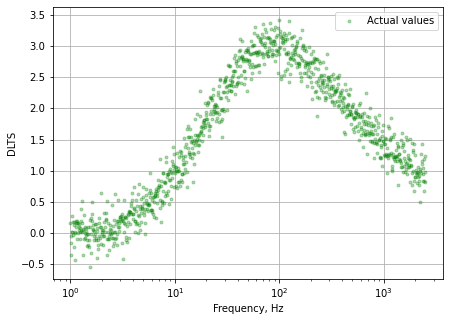

In [3]:
frequency, actual_dlts = make_exp_data(f_pulse=F_PULSE,
                                       time_constant=TIME_CONSTANT,
                                       ampl=AMPL,
                                       p=P_COEF,
                                       std_dev=STDDEV,
                                       num_ex=NUM_EXAMPLES)

plt.figure(figsize=(7,5))
plt.semilogx(frequency, actual_dlts, '.g', label="Actual values", alpha=0.3)
plt.xlabel('Frequency, Hz')
plt.ylabel('DLTS')
plt.legend()
plt.grid()
# plt.savefig('plots/monoexponential/p_experimental_data.svg')
plt.show()

In [4]:
actual_dlts

<tf.Tensor: shape=(1000,), dtype=float32, numpy=
array([ 1.60022274e-01, -3.57886881e-01, -4.15907279e-02, -1.59941614e-01,
        1.51096582e-02,  2.79157370e-01,  1.09720211e-02,  1.85150638e-01,
       -2.62976587e-02,  1.23791270e-01,  1.78042367e-01, -2.29419604e-01,
       -3.21181025e-03, -4.24233258e-01,  2.60655098e-02,  9.57475677e-02,
        1.70411587e-01,  1.90422550e-01,  1.92338824e-01,  1.69634670e-01,
       -8.95594954e-02,  1.57576963e-01,  5.74223045e-03,  1.41949996e-01,
        9.16219354e-02,  5.15327379e-02, -1.00860424e-01,  8.72066692e-02,
        2.64380686e-02,  3.90199423e-01,  3.87083776e-02,  1.93595067e-01,
        1.86007973e-02,  1.65265724e-01,  5.18984854e-01,  5.44732101e-02,
        6.61565363e-02, -3.51996094e-01,  2.87997812e-01, -8.85190219e-02,
        2.60237325e-03,  9.16411206e-02, -7.01781064e-02,  3.07357721e-02,
       -2.86592506e-02,  7.47346431e-02, -1.09864198e-01, -1.86451264e-02,
       -2.11100012e-01, -1.10436827e-02, -1.8491572

# Модель до оптимизации параметров

Initial values:
Time constant power = -2.3229 log10(s)
Time constant = 0.0048 s
Amplitude = 2.3928 pF
MSE = 0.5506
RMSE = 0.742027


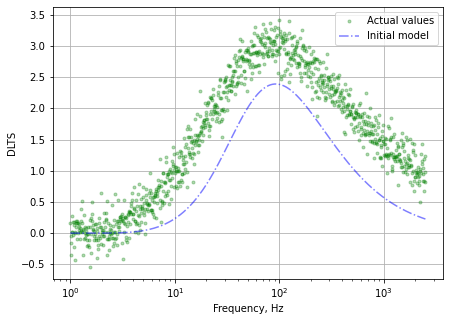

In [5]:
INITIAL_TIME_CONSTANT = float(np.random.uniform(low=-3, high=-0.5))
INITIAL_AMPLITUDE = float(np.random.uniform(low=0.3, high=3.3))

initial_model = MonoexponentialModelP(filling_pulse=F_PULSE,
                                      time_constant_power=INITIAL_TIME_CONSTANT,
                                      amplitude=INITIAL_AMPLITUDE)

fig, ax = print_results(frequency = frequency, 
                        actual_dlts = actual_dlts,
                        initial_model = initial_model)

plt.show()

# Оптимизация модели простым градиентным спуском

Initial values:
Time constant power = -2.3229 log10(s)
Time constant = 0.0048 s
Amplitude = 2.3928 pF
MSE = 0.5506
RMSE = 0.742027

Final values:
Time constant power = -2.3033 log10(s)
Time constant = 0.0050 s
Amplitude = 3.0029 pF
MSE = 0.0404
RMSE = 0.200908
p = 0.5152


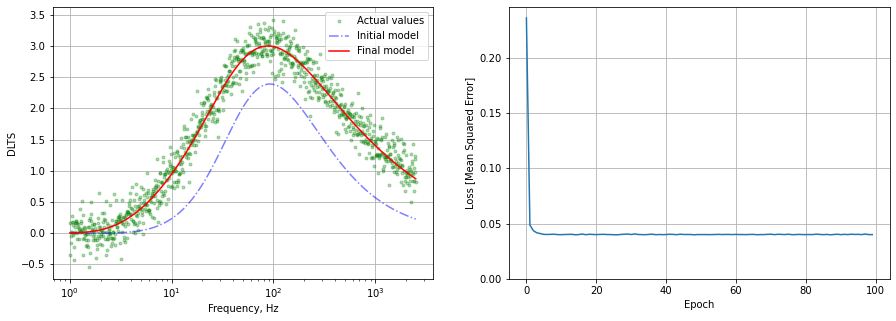

In [6]:
final_model = MonoexponentialModelP(filling_pulse=F_PULSE,
                                    time_constant_power=INITIAL_TIME_CONSTANT,
                                    amplitude=INITIAL_AMPLITUDE
                                   )

final_model.compile(run_eagerly=False,
                    loss=tf.keras.losses.MSE,
                    optimizer=tf.optimizers.SGD(learning_rate=LEARNING_RATE))

history = final_model.fit(frequency, actual_dlts, epochs=EPOCHS, batch_size=100, verbose=False)

fig, ax = print_results(frequency = frequency,
                        actual_dlts = actual_dlts,
                        initial_model = initial_model,
                        final_model = final_model,
                        history = history
                       )

print(f'p = {final_model.p_coef.numpy():.4f}')

# plt.savefig('plots/monoexponential/p_SGD.svg')
plt.show()

# Оптимизация параметров модели алгоритмом Adagrad

Initial values:
Time constant power = -2.3229 log10(s)
Time constant = 0.0048 s
Amplitude = 2.3928 pF
MSE = 0.5506
RMSE = 0.742027

Final values:
Time constant power = -2.2987 log10(s)
Time constant = 0.0050 s
Amplitude = 3.0077 pF
MSE = 0.0399
RMSE = 0.199666
p = 0.4999


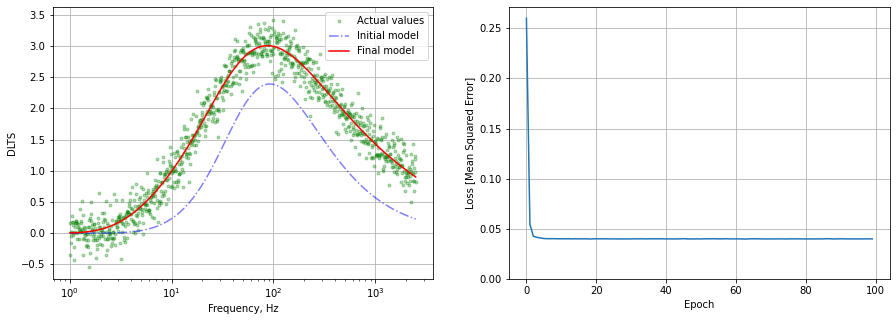

In [7]:
final_model = MonoexponentialModelP(filling_pulse=F_PULSE,
                                    time_constant_power=INITIAL_TIME_CONSTANT,
                                    amplitude=INITIAL_AMPLITUDE
                                   )

final_model.compile(run_eagerly=False,
                    loss=tf.keras.losses.MSE,
                    optimizer=tf.optimizers.Adagrad(learning_rate=LEARNING_RATE))

history = final_model.fit(frequency, actual_dlts, epochs=EPOCHS, batch_size=100, verbose=False)

print_results(frequency = frequency,
              actual_dlts = actual_dlts,
              initial_model = initial_model,
              final_model = final_model,
              history = history
             )

print(f'p = {final_model.p_coef.numpy():.4f}')

# plt.savefig('plots/monoexponential/p_Adagrad.svg')
plt.show()

# Оптимизация параметров модели алгоритмом Adamax

Initial values:
Time constant power = -2.3229 log10(s)
Time constant = 0.0048 s
Amplitude = 2.3928 pF
MSE = 0.5506
RMSE = 0.742027

Final values:
Time constant power = -2.3118 log10(s)
Time constant = 0.0049 s
Amplitude = 3.0019 pF
MSE = 0.0404
RMSE = 0.201072
p = 0.5072


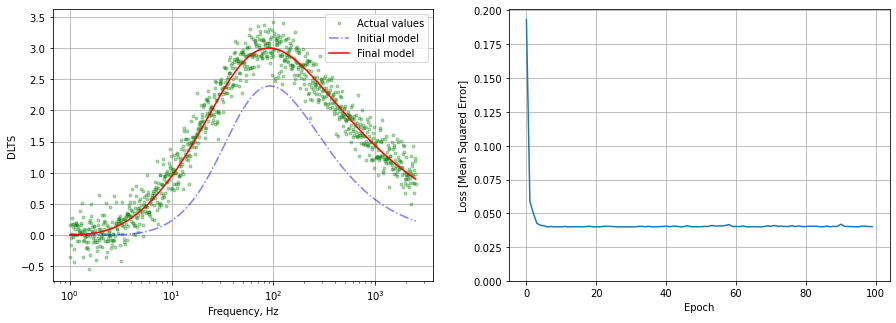

In [8]:
final_model = MonoexponentialModelP(filling_pulse=F_PULSE,
                                    time_constant_power=INITIAL_TIME_CONSTANT,
                                    amplitude=INITIAL_AMPLITUDE
                                   )

final_model.compile(run_eagerly=False,
                    loss=tf.keras.losses.MSE,
                    optimizer=tf.optimizers.Adamax(learning_rate=LEARNING_RATE))

history = final_model.fit(frequency, actual_dlts, epochs=EPOCHS, batch_size=100, verbose=False)

print_results(frequency = frequency,
              actual_dlts = actual_dlts,
              initial_model = initial_model,
              final_model = final_model,
              history = history
             )

print(f'p = {final_model.p_coef.numpy():.4f}')

# plt.savefig('plots/monoexponential/p_Adamax.svg')
plt.show()